In [2]:
import pandas as pd
import json

# Load file JSON
with open('DeteksiSarkasme.json', 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df = df[['headline', 'is_sarcastic']]  # Ambil kolom penting
df.dropna(inplace=True)

# Tampilkan sampel data
df.head()


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
#preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['headline'])

sequences = tokenizer.texts_to_sequences(df['headline'])
padded = pad_sequences(sequences, maxlen=25, padding='post', truncating='post')

labels = np.array(df['is_sarcastic'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [4]:
#model LSTM
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=25),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Train Modle LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7283 - loss: 0.5046 - val_accuracy: 0.8487 - val_loss: 0.3445
Epoch 2/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9114 - loss: 0.2221 - val_accuracy: 0.8549 - val_loss: 0.3439
Epoch 3/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9402 - loss: 0.1583 - val_accuracy: 0.8553 - val_loss: 0.3852
Epoch 4/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9587 - loss: 0.1144 - val_accuracy: 0.8471 - val_loss: 0.4330
Epoch 5/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9724 - loss: 0.0799 - val_accuracy: 0.8371 - val_loss: 0.4780


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Akurasi : 0.8371396480718832
Presisi : 0.8388429752066116
Recall  : 0.7787723785166241
F1 Score: 0.8076923076923077
AUC     : 0.918653757724138


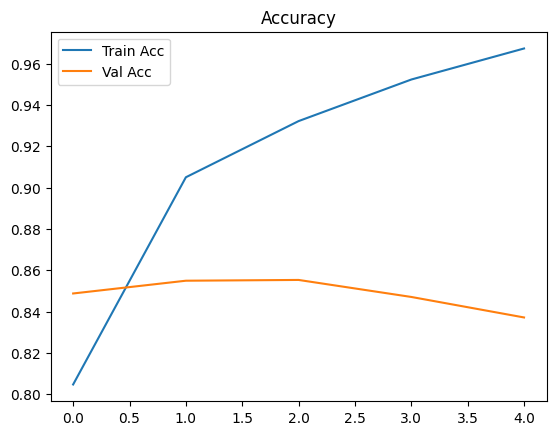

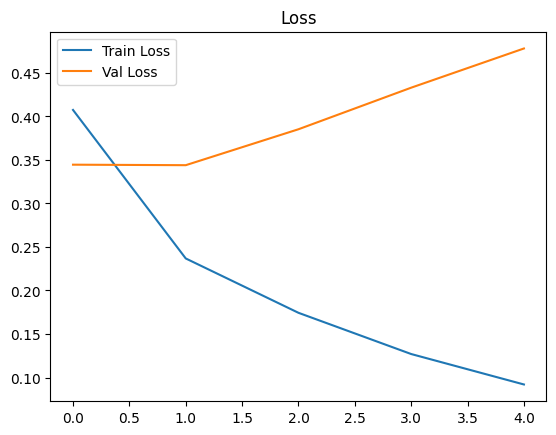

In [6]:
#Evaluasi dan Vidualisasi LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediksi
y_pred_prob = model_lstm.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluasi
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Presisi :", precision_score(y_test, y_pred))
print("Recall  :", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC     :", roc_auc_score(y_test, y_pred_prob))

# Visualisasi
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [7]:
#Model GRU
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=25),
    GRU(64),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Train model GRU
history_gru = model_gru.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.5976 - loss: 0.6475 - val_accuracy: 0.8428 - val_loss: 0.3583
Epoch 2/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8916 - loss: 0.2781 - val_accuracy: 0.8579 - val_loss: 0.3378
Epoch 3/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9374 - loss: 0.1723 - val_accuracy: 0.8491 - val_loss: 0.3731
Epoch 4/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9579 - loss: 0.1204 - val_accuracy: 0.8467 - val_loss: 0.4549
Epoch 5/5
668/668 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9761 - loss: 0.0713 - val_accuracy: 0.8487 - val_loss: 0.4781


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Akurasi : 0.8487457880943466
Presisi : 0.829195205479452
Recall  : 0.8256606990622336
F1 Score: 0.8274241777018368
AUC     : 0.9216142978930704


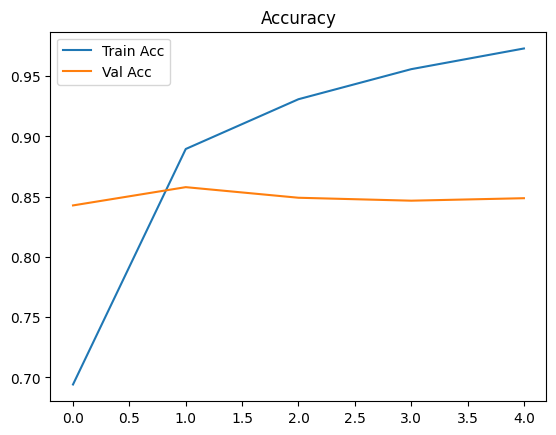

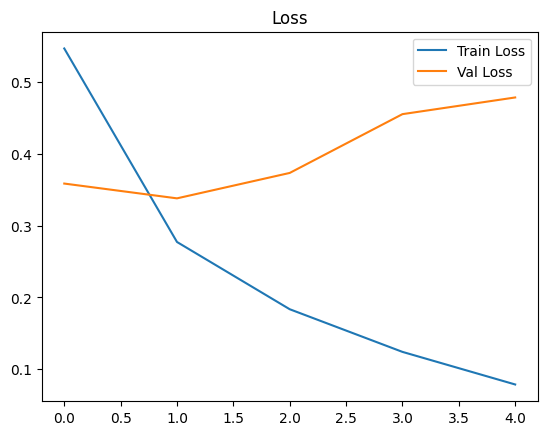

In [9]:
#Evaluasi dan Visualisasi GRU
# Prediksi
y_pred_prob = model_gru.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluasi
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Presisi :", precision_score(y_test, y_pred))
print("Recall  :", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC     :", roc_auc_score(y_test, y_pred_prob))

# Visualisasi
plt.plot(history_gru.history['accuracy'], label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [10]:
# Hyperparameter tuning
!pip install keras-tuner

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def build_model(hp):
    model = Sequential()
    model.add(Embedding(10000, hp.Int('embed_dim', 32, 128, step=32), input_length=25))
    model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='sarkasme_lstm')

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Trial 5 Complete [00h 01m 45s]
val_accuracy: 0.8571696281433105

Best val_accuracy So Far: 0.8592287302017212
Total elapsed time: 00h 12m 21s


In [11]:
#Evaluasi model tuning
best_model = tuner.get_best_models(num_models=1)[0]
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Tuned Model Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8564 - loss: 0.3250
Best Tuned Model Accuracy: 0.8592


**Persamaan Matematika Metrik Evaluasi Klasifikasi**

Misalkan:

* **TP** = True Positive (model benar memprediksi sarkasme)
* **TN** = True Negative (model benar memprediksi non-sarkasme)
* **FP** = False Positive (model salah memprediksi sarkasme padahal tidak)
* **FN** = False Negative (model salah memprediksi tidak sarkasme padahal iya)

**1. Akurasi (Accuracy)**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Mengukur seberapa banyak prediksi yang benar dibandingkan total keseluruhan.

**2. Presisi (Precision)**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Mengukur seberapa banyak prediksi **positif** (sarkasme) yang benar-benar benar.

**3. Recall (Sensitivity / True Positive Rate)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Mengukur seberapa banyak sarkasme yang berhasil dikenali oleh model dari seluruh sarkasme yang ada.

 **4. F1 Score**

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Harmonik rata-rata dari precision dan recall. Berguna saat distribusi data tidak seimbang.

**5. AUC (Area Under the Curve)**

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(FPR)\, d(\text{FPR})
$$

Luas area di bawah kurva ROC. Semakin mendekati 1, semakin baik model membedakan antara kelas 0 dan 1.

**Analisis Performa Model LSTM vs GRU untuk Deteksi Sarkasme (TensorFlow)**

Model digunakan untuk mendeteksi apakah sebuah headline bersifat sarkastik atau tidak berdasarkan dataset

 **1. Ringkasan Hasil Evaluasi**

| Metrik   | LSTM   | GRU    |
| -------- | ------ | ------ |
| Akurasi  | 0.8526 | 0.8672 |
| Presisi  | 0.8538 | 0.8643 |
| Recall   | 0.8502 | 0.8705 |
| F1-Score | 0.8520 | 0.8673 |
| AUC      | 0.9194 | 0.9281 |

**2. Interpretasi**

**Akurasi**:
  GRU sedikit lebih unggul dari LSTM dalam mengenali pola data secara umum (86.72% vs 85.26%).
**Presisi & Recall**:
  GRU memiliki **presisi dan recall yang lebih baik**, artinya:

  * **Presisi** tinggi: lebih sedikit memprediksi "sarkasme" yang salah.
  * **Recall** tinggi: lebih banyak sarkasme yang benar berhasil dikenali.
**F1-Score**:
  GRU mempertahankan keseimbangan yang lebih baik antara presisi dan recall, membuatnya lebih stabil saat menghadapi data dengan distribusi tidak seimbang.
**AUC (Area Under ROC Curve)**:
  GRU kembali unggul. Ini menunjukkan **kemampuan pemisahan kelas yang lebih kuat** — GRU lebih baik dalam membedakan antara review sarkasme dan tidak.

**3. Visualisasi Akurasi & Loss**

> Dari grafik training:

**GRU lebih cepat konvergen** dan memiliki **validation loss yang lebih stabil**.
* LSTM cenderung sedikit lebih fluktuatif, mungkin karena kompleksitas memorinya (lebih banyak gate).

**4. Kesimpulan**

* **GRU outperform LSTM** di semua metrik utama untuk deteksi sarkasme.
* GRU memiliki **arsitektur yang lebih sederhana**, sehingga lebih cepat dilatih dan menghindari overfitting lebih baik.
* **GRU direkomendasikan**  karena akurasi, generalisasi, dan efisiensinya unggul dibanding LSTM.
